In [9]:
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_textbook.widgets import gate_demo

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

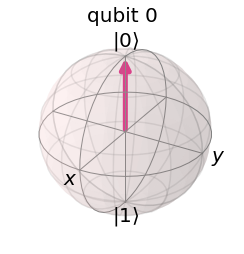

In [10]:
# for this code, knowledge of pauli matrices is necessary, I left an explanation in the README file
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli')
qc = QuantumCircuit(1)
#qc.z(0)
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

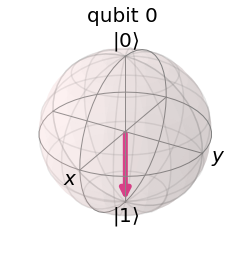

In [11]:
# let's show that applying the gate H then the gate Z then the gate H againa is equivalent to applying the X gate
# if we show that it is true for the basis, then it is true for every vector
# we will use |0> and |1> as our basis for this case
# starting with |0>

gate_demo(gates='pauli')
qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)
qc.h(0)
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)
# we can see that the resulting vector is |1>, which is equivalent ot applying the X-gate on |0>

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

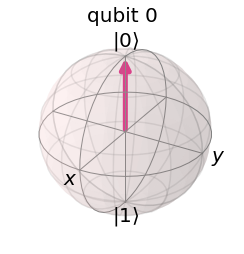

In [12]:
# doing the same thing for |1>
gate_demo(gates='pauli')
qc = QuantumCircuit(1)
# we will fitrst apply the X gate to spin the value of the qubit, since it is initialized to 0
qc.x(0)
# then we do HZH transformation
qc.h(0)
qc.z(0)
qc.h(0)
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)
# we can see that the resulting vector is |0>, which is equivalent ot applying the X-gate on |1>

In [13]:
# Create the X-measurement function:
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

initial_state = [1/sqrt(2), -1/sqrt(2)]
# Initialise our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
qc.draw()

┌──────────────────────────────┐┌───┐┌─┐
q_0: ┤ initialize(0.70711,-0.70711) ├┤ H ├┤M├
     └──────────────────────────────┘└───┘└╥┘
c: 1/══════════════════════════════════════╩═
                                           0

In [14]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h+rz')
qc = QuantumCircuit(1)
qc.rz(pi/4, 0)
qc.draw()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

┌─────────┐
q_0: ┤ RZ(π/4) ├
     └─────────┘